# Plotting Quantum Advantage for different classes of Algorithms

In [88]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Importing the requisite Libraries for plotting.

In [89]:
#initialize the N axis
N = np.linspace(2,1000, 1000)

quantum_comp = []
classical_comp = []

r_comp = np.array

We then initialize the N axis for natural numbers from 1 to 10000.

'quantum_comp' and 'classical_comp' are lists storing lists of values evaluated for the respective complexity functions for
a given class of algorithms.

Here, we depict the following classes:
    1. Prime Factorization
    2. Unstructured Search
    3. Verifying Matrix Products
    4. Formula Evaluation
    5. Abelian Hidden Subgroup
    6. Subset sum
    7. Matrix Multiplication over Semirings
    8. Deutsch-Jozsa 

1 For Prime Factorization:
    1. Complexity order of Classical Algorithm: 2^((log N)(log(log N))
    2. Complexity order of Quantum Algorithm: N^3

In [90]:
#1prime factorization
classical_comp.append([2**((np.log(n))*(np.log(np.log(n)))) for n in N])
quantum_comp.append([n**3 for n in N])

2 For Unstructured Search:
    1. Complexity order of Classical Algorithm: 2^n
    2. Complexity order of Quantum Algorithm: 2^(n/2)

In [91]:
#2 unstructured search
classical_comp.append([2**n for n in N])
quantum_comp.append([2**(n/2) for n in N]) 

3 For Formula Evaluation:

1. Complexity order of Classical Algorithm: n^2
2. Complexity order of Quantum Algorithm: n^7/4

In [92]:
#3.Verifying Matrix Products
classical_comp.append([n**2 for n in N])
quantum_comp.append([n**(7/4) for n in N]) 

4 For Formula Evaluation:
    1. Complexity order of Quantum Algorithm: 2^0.5n
    2. Complexity order of Classical Algorithm: 2^0.753n

In [93]:
#4Formula Evaluation
quantum_comp.append([2**(0.5*n) for n in N])
classical_comp.append([2**(0.753*n) for n in N])

5 For Abelian Hidden Subgroup:
    1. Complexity order of Quantum Algorithm: log(n)
    2. Complexity order of Classical Algorithm: n

In [94]:
#5Abelian Hidden Subgroup
quantum_comp.append([np.log(n) for n in N])
classical_comp.append([n for n in N])

6 For Subset sum:
    1. Complexity order of Classical Algorithm: 2^0.291n
    2. Complexity order of Quantum Algorithm: 2^0.241n

In [95]:
#6Subset sum
classical_comp.append([2**(0.291*n) for n in N])
quantum_comp.append([2**(0.241*n) for n in N])

7 For Matrix multiplication over semirings:
    1. Complexity order of Classical Algorithm:n^2.687
    2. Complexity order of Quantum Algorithm: n^2.473

In [96]:
#7matrix multiplication over semirings
classical_comp.append([n**(2.687) for n in N])
quantum_comp.append([n**(2.473) for n in N])

8 For Deutsch-Jozsa algorithm

1. Complexity order of Classical Algorithm:2^(n-1)+1
2. Complexity order of Quantum Algorithm: n

In [97]:
#8 Deutsch-Josza 
classical_comp.append([(2**(n-1))+1 for n in N])
quantum_comp.append([n for n in N])

9 For HHL algorithm vs gaussian elimination algorithm

    Complexity order of Classical Algorithm: n^3
    Complexity order of Quantum Algorithm: log(n)*k^2



In [98]:
#9 
classical_comp.append([n**3 for n in N]) #9 Gaussiuan elimination algoritm
quantum_comp.append([(np.log(n))*(100) for n in N]) #9 HHL algorithm where k^2, with k=10 is 100

In [99]:
algorithms = ['Prime_Factorization', 'Unstructured_Search', 'Matrix_products_Verification',\
              'Formula_Evaluation', 'Abelian_Hidden_Subgroup', 'Polynomial_Interpolation',\
              'Subset_sum', 'Matrix_multiplication_over_Semirings', 'Solving Linear Systems']

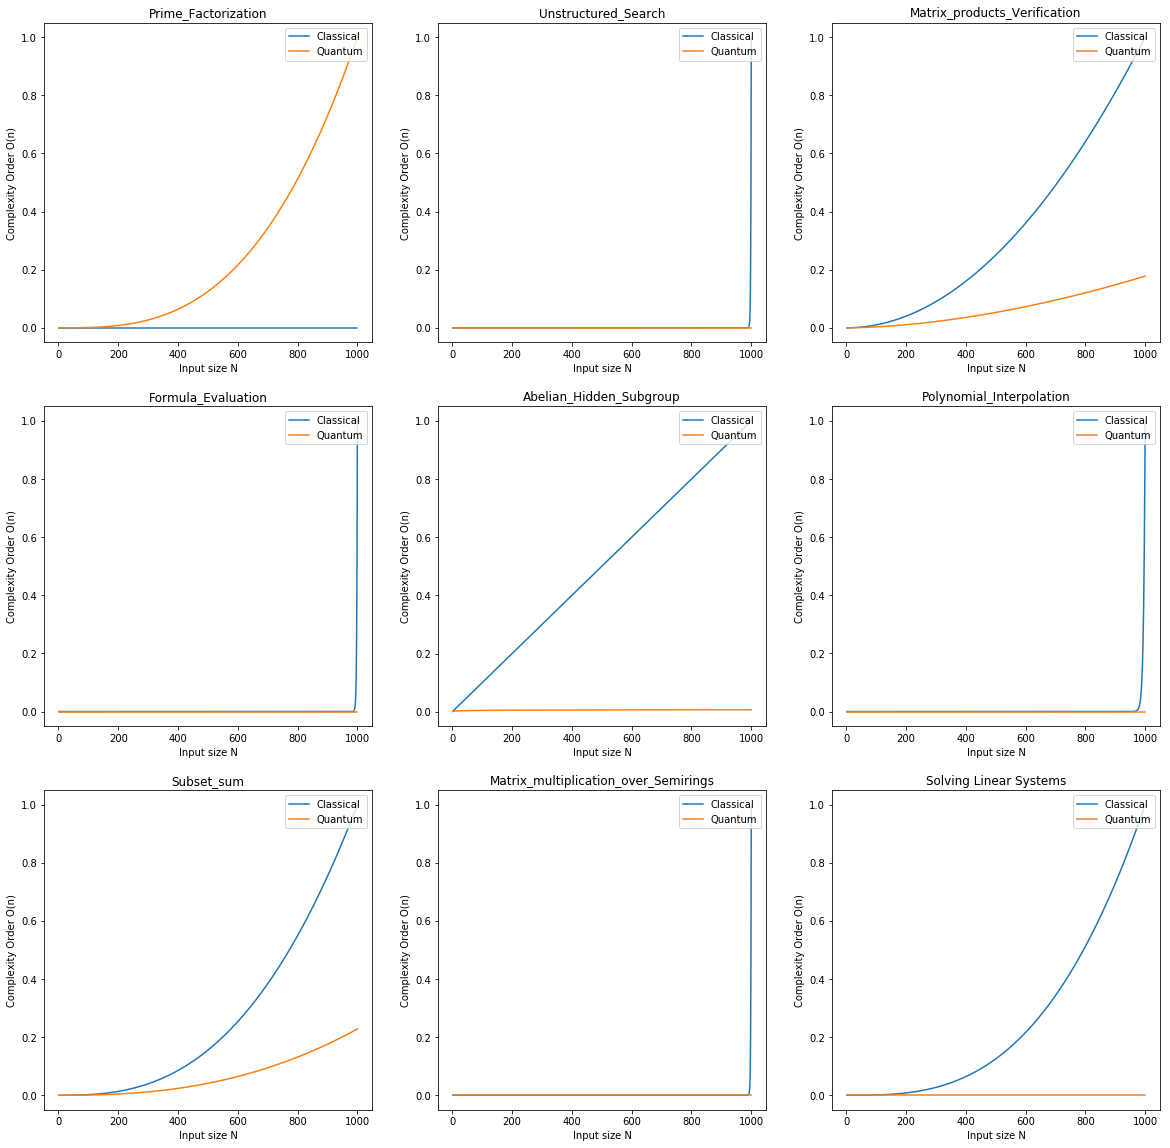

In [100]:
%matplotlib inline

plt.figure(figsize = (20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
     
    maximum = max(max(quantum_comp[i-1]),max(classical_comp[i-1]))
    plt.plot(N, (classical_comp[i-1]/maximum), label = 'Classical')
    plt.plot(N, (quantum_comp[i-1]/maximum), label = 'Quantum')
   
    plt.xlabel('Input size N')
    plt.ylabel('Complexity Order O(n)')
    plt.legend(loc = 'upper right')
    plt.title(algorithms[i-1])

plt.show()

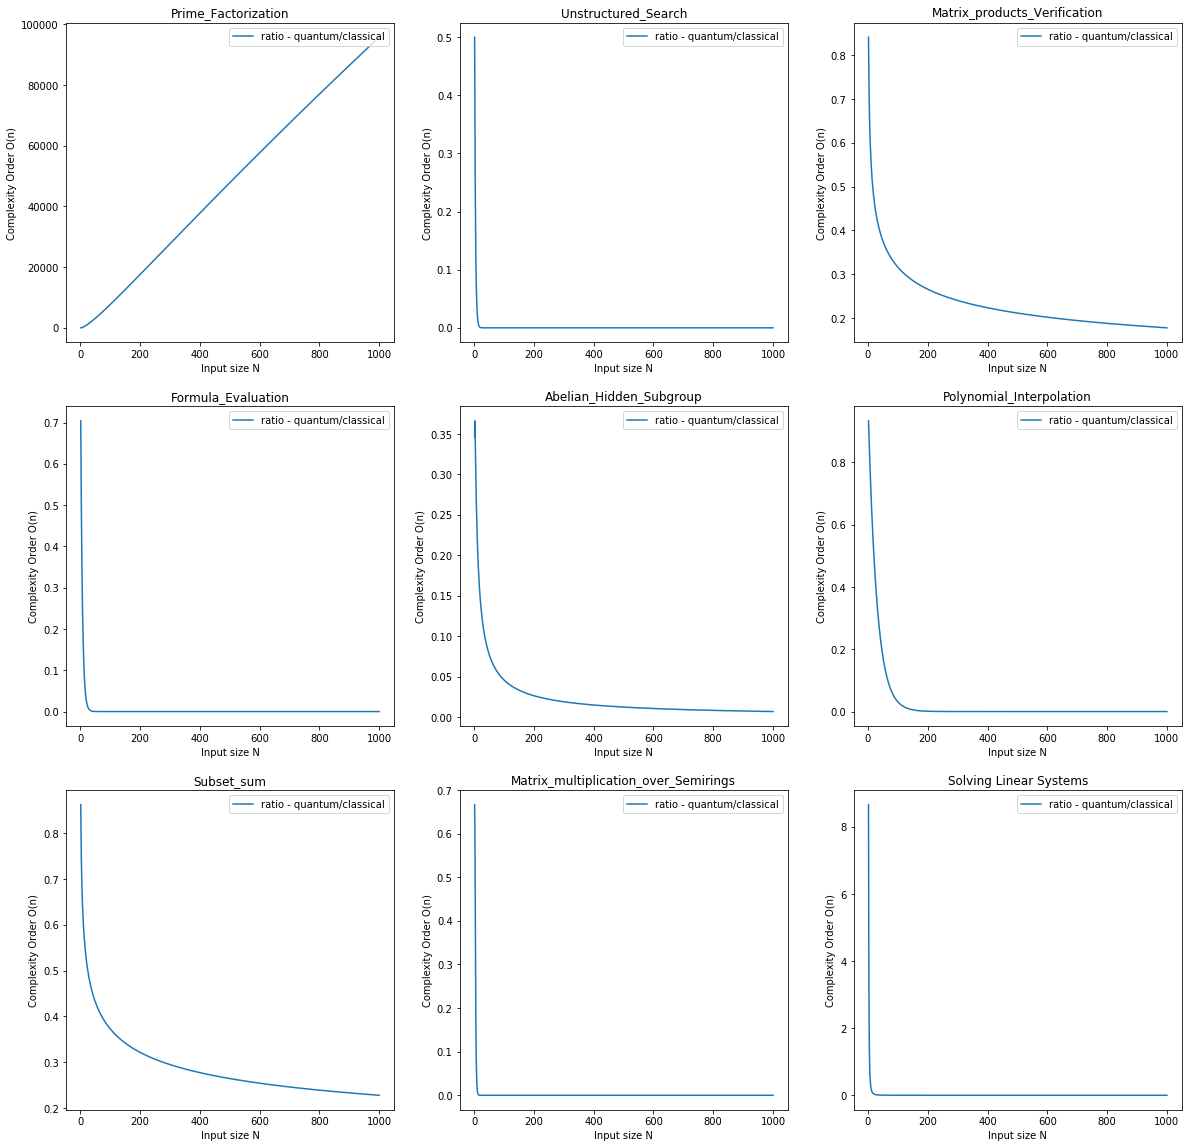

In [101]:
%matplotlib inline

r_comp = np.array(quantum_comp)/np.array(classical_comp)

plt.figure(figsize = (20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    
    plt.plot(N, r_comp[i-1],label = 'ratio - quantum/classical')

    plt.xlabel('Input size N')
    plt.ylabel('Complexity Order O(n)')
    plt.legend(loc = 'upper right')
    plt.title(algorithms[i-1])

    

plt.show()

The speedup in runtime of quantum computation compared to classical calculation is measured by the ratio of quantum/classical 
Therefore, decreasing ratio function correlates/shows the domination of runtime efficieny of quantum algorithm over classical algorithm



[[<matplotlib.lines.Line2D object at 0x115f27c50>], [<matplotlib.lines.Line2D object at 0x115f27da0>], [<matplotlib.lines.Line2D object at 0x1166896a0>], [<matplotlib.lines.Line2D object at 0x116689ac8>], [<matplotlib.lines.Line2D object at 0x116689ef0>], [<matplotlib.lines.Line2D object at 0x116689fd0>], [<matplotlib.lines.Line2D object at 0x116689eb8>], [<matplotlib.lines.Line2D object at 0x116677e10>], [<matplotlib.lines.Line2D object at 0x1166777b8>]]


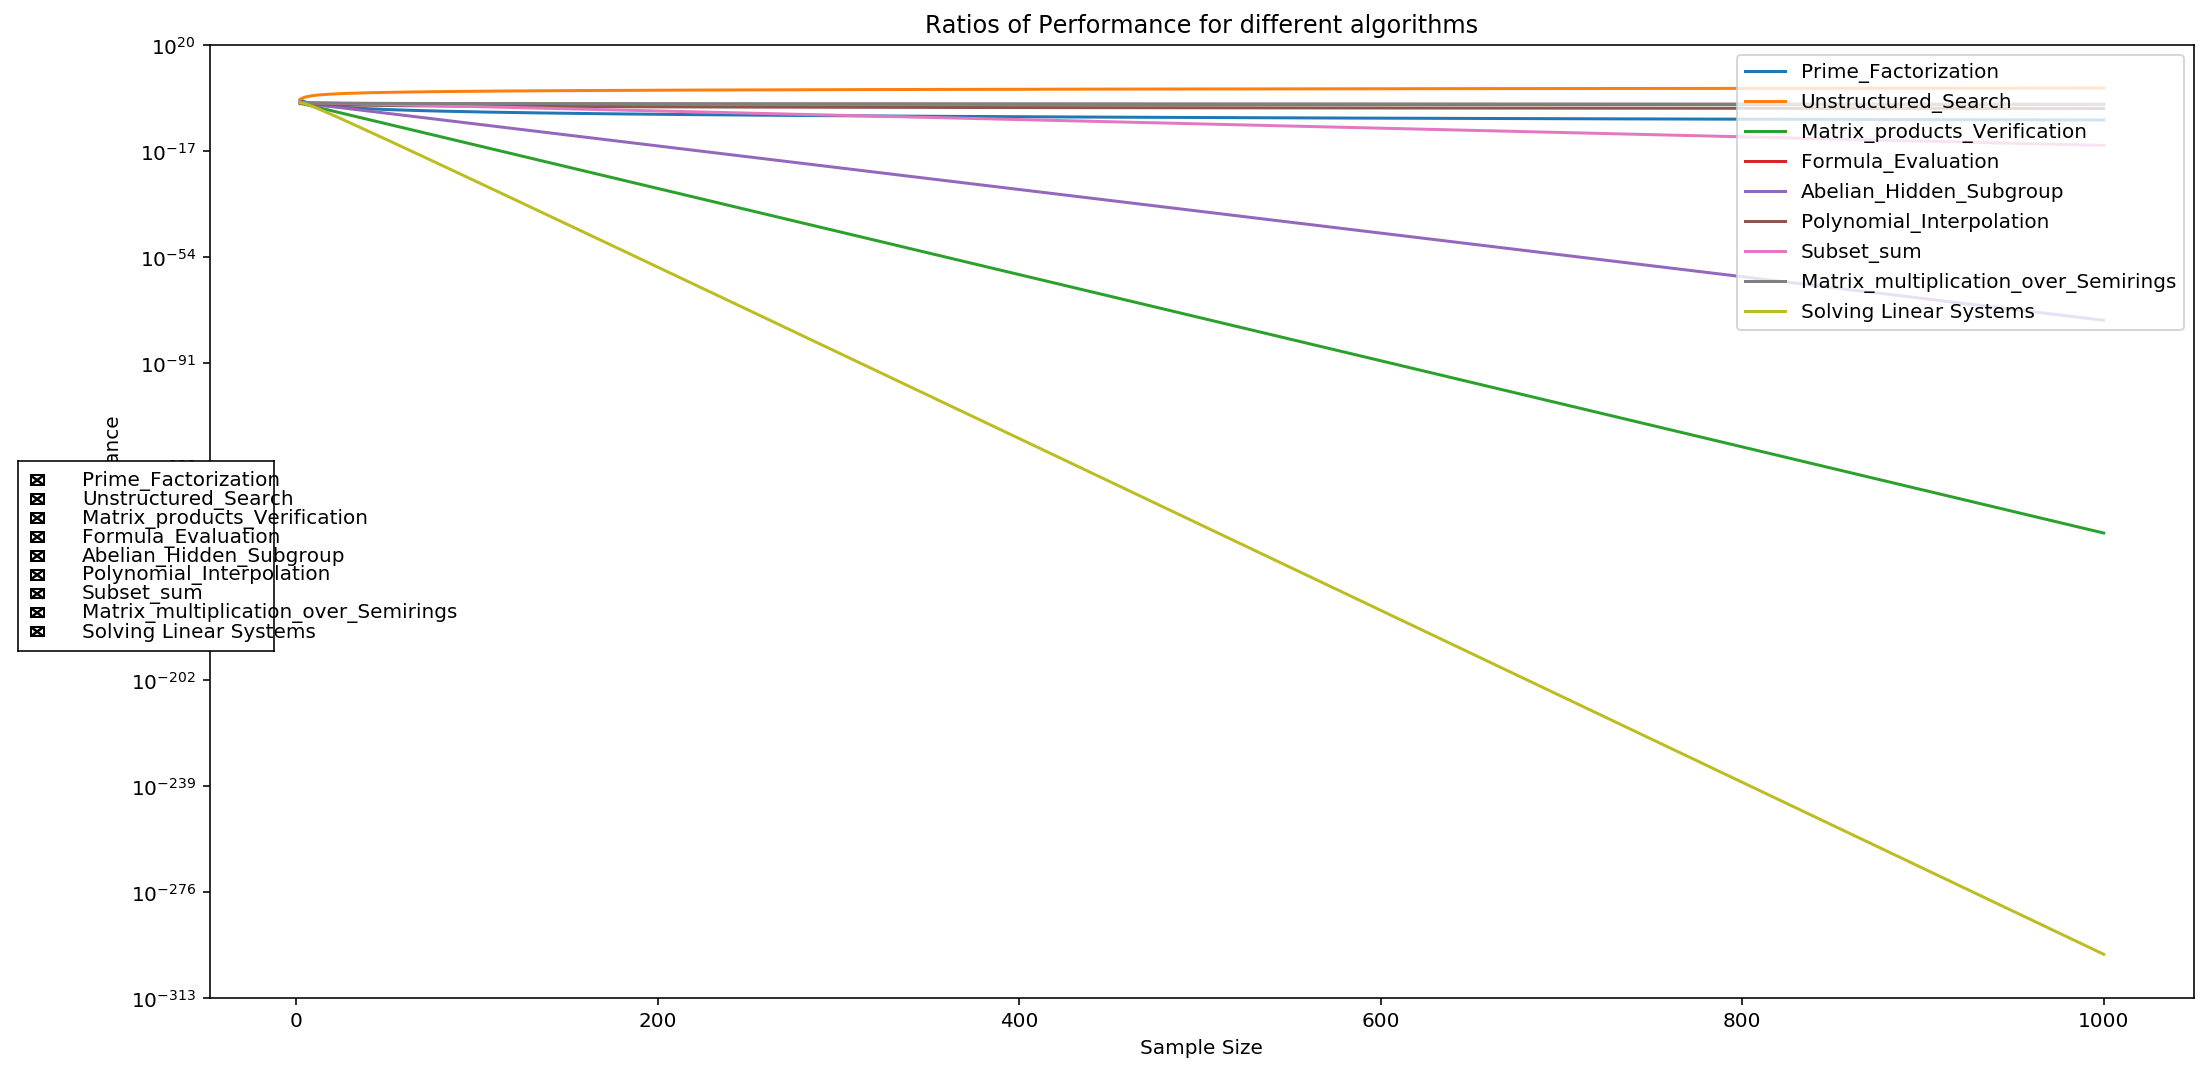

In [102]:
%matplotlib qt
from matplotlib.widgets import CheckButtons

#algorithms = algorithms[3:7]

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)

#fig, ax = plt.subplot()
line_objects = []
for i, algorithm in enumerate(algorithms):
    
    line_objects.append(ax.plot(N, r_comp[i-1],label = algorithm))
 
    
    
plt.xlabel('Sample Size')
plt.ylabel('Ratio of Performance')
plt.legend(loc = 'upper right')
plt.title("Ratios of Performance for different algorithms")
plt.autoscale(True,True,True)
ax.set_yscale("log")


rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, algorithms, np.ones(10))
def func(label):
    """if label == '':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    """
    for i, algorithm in enumerate(algorithms):
        if label == algorithm:
            line_objects[i][0].set_visible(not line_objects[i][0].get_visible())
    
    ax.set_yscale("log", nonposy='clip')
    plt.draw()
check.on_clicked(func)


plt.show()

print(line_objects)